# Dog - Convolutional Neural Network

### Download dataset

In [12]:
#pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#conda install -c https://conda.binstar.org/menpo opencv

In [26]:
pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install opencv-python
#pip3 install opencv-python
#pip install opencv-python==4.6.0.66

In [15]:
import cv2    # computer vision library
import shutil # copy files

from sklearn.model_selection import train_test_split

In [16]:
print(cv2.__version__)

4.9.0


#### You are provided with a training set and a test set of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs. The goal of the competition is to create a classifier capable of determining a dog's breed from a photo.


In [17]:
import numpy as np
from tqdm import tqdm
import pandas as pd

In [18]:
df = pd.read_csv('labels.csv')
df.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [20]:
n = len(df)
breed = set(df['breed'])
n_class = len(breed)

print(n, '\n',
      breed, '\n',
      n_class)

10222 
 {'sealyham_terrier', 'rhodesian_ridgeback', 'border_terrier', 'black-and-tan_coonhound', 'whippet', 'irish_setter', 'japanese_spaniel', 'shih-tzu', 'chow', 'pomeranian', 'irish_wolfhound', 'tibetan_mastiff', 'giant_schnauzer', 'newfoundland', 'brittany_spaniel', 'chesapeake_bay_retriever', 'clumber', 'soft-coated_wheaten_terrier', 'dandie_dinmont', 'english_springer', 'walker_hound', 'sussex_spaniel', 'african_hunting_dog', 'basenji', 'samoyed', 'miniature_pinscher', 'miniature_poodle', 'great_dane', 'west_highland_white_terrier', 'silky_terrier', 'malinois', 'australian_terrier', 'french_bulldog', 'entlebucher', 'irish_terrier', 'lakeland_terrier', 'english_foxhound', 'collie', 'golden_retriever', 'pug', 'border_collie', 'italian_greyhound', 'standard_schnauzer', 'blenheim_spaniel', 'shetland_sheepdog', 'greater_swiss_mountain_dog', 'vizsla', 'leonberg', 'brabancon_griffon', 'boston_bull', 'great_pyrenees', 'welsh_springer_spaniel', 'standard_poodle', 'dhole', 'beagle', 'berne

In [21]:
class_to_num = dict(zip(breed, range(n_class)))
class_to_num

{'sealyham_terrier': 0,
 'rhodesian_ridgeback': 1,
 'border_terrier': 2,
 'black-and-tan_coonhound': 3,
 'whippet': 4,
 'irish_setter': 5,
 'japanese_spaniel': 6,
 'shih-tzu': 7,
 'chow': 8,
 'pomeranian': 9,
 'irish_wolfhound': 10,
 'tibetan_mastiff': 11,
 'giant_schnauzer': 12,
 'newfoundland': 13,
 'brittany_spaniel': 14,
 'chesapeake_bay_retriever': 15,
 'clumber': 16,
 'soft-coated_wheaten_terrier': 17,
 'dandie_dinmont': 18,
 'english_springer': 19,
 'walker_hound': 20,
 'sussex_spaniel': 21,
 'african_hunting_dog': 22,
 'basenji': 23,
 'samoyed': 24,
 'miniature_pinscher': 25,
 'miniature_poodle': 26,
 'great_dane': 27,
 'west_highland_white_terrier': 28,
 'silky_terrier': 29,
 'malinois': 30,
 'australian_terrier': 31,
 'french_bulldog': 32,
 'entlebucher': 33,
 'irish_terrier': 34,
 'lakeland_terrier': 35,
 'english_foxhound': 36,
 'collie': 37,
 'golden_retriever': 38,
 'pug': 39,
 'border_collie': 40,
 'italian_greyhound': 41,
 'standard_schnauzer': 42,
 'blenheim_spaniel': 

In [22]:
num_to_class = dict(zip(range(n_class), breed))
num_to_class

{0: 'sealyham_terrier',
 1: 'rhodesian_ridgeback',
 2: 'border_terrier',
 3: 'black-and-tan_coonhound',
 4: 'whippet',
 5: 'irish_setter',
 6: 'japanese_spaniel',
 7: 'shih-tzu',
 8: 'chow',
 9: 'pomeranian',
 10: 'irish_wolfhound',
 11: 'tibetan_mastiff',
 12: 'giant_schnauzer',
 13: 'newfoundland',
 14: 'brittany_spaniel',
 15: 'chesapeake_bay_retriever',
 16: 'clumber',
 17: 'soft-coated_wheaten_terrier',
 18: 'dandie_dinmont',
 19: 'english_springer',
 20: 'walker_hound',
 21: 'sussex_spaniel',
 22: 'african_hunting_dog',
 23: 'basenji',
 24: 'samoyed',
 25: 'miniature_pinscher',
 26: 'miniature_poodle',
 27: 'great_dane',
 28: 'west_highland_white_terrier',
 29: 'silky_terrier',
 30: 'malinois',
 31: 'australian_terrier',
 32: 'french_bulldog',
 33: 'entlebucher',
 34: 'irish_terrier',
 35: 'lakeland_terrier',
 36: 'english_foxhound',
 37: 'collie',
 38: 'golden_retriever',
 39: 'pug',
 40: 'border_collie',
 41: 'italian_greyhound',
 42: 'standard_schnauzer',
 43: 'blenheim_spanie

In [23]:
num_to_class

{0: 'sealyham_terrier',
 1: 'rhodesian_ridgeback',
 2: 'border_terrier',
 3: 'black-and-tan_coonhound',
 4: 'whippet',
 5: 'irish_setter',
 6: 'japanese_spaniel',
 7: 'shih-tzu',
 8: 'chow',
 9: 'pomeranian',
 10: 'irish_wolfhound',
 11: 'tibetan_mastiff',
 12: 'giant_schnauzer',
 13: 'newfoundland',
 14: 'brittany_spaniel',
 15: 'chesapeake_bay_retriever',
 16: 'clumber',
 17: 'soft-coated_wheaten_terrier',
 18: 'dandie_dinmont',
 19: 'english_springer',
 20: 'walker_hound',
 21: 'sussex_spaniel',
 22: 'african_hunting_dog',
 23: 'basenji',
 24: 'samoyed',
 25: 'miniature_pinscher',
 26: 'miniature_poodle',
 27: 'great_dane',
 28: 'west_highland_white_terrier',
 29: 'silky_terrier',
 30: 'malinois',
 31: 'australian_terrier',
 32: 'french_bulldog',
 33: 'entlebucher',
 34: 'irish_terrier',
 35: 'lakeland_terrier',
 36: 'english_foxhound',
 37: 'collie',
 38: 'golden_retriever',
 39: 'pug',
 40: 'border_collie',
 41: 'italian_greyhound',
 42: 'standard_schnauzer',
 43: 'blenheim_spanie

In [24]:
#width = 299
width = 64
X = np.zeros((n, width, width, 3), dtype=np.uint8)
y = np.zeros((n, n_class), dtype=np.uint8)

In [ ]:
for i in tqdm(range(n)):
    X[i] = cv2.resize(cv2.imread('train/%s.jpg' % df['id'][i]), (width, width))
    y[i][class_to_num[df['breed'][i]]] = 1

In [11]:
cv2.imread?
#The function imread loads an image from the specified file and returns it.
#Функция imread загружает изображение из указанного файла и возвращает его с указанными размерами.

In [44]:
print(X.shape)
print(y.shape)

(10222, 64, 64, 3)
(10222, 120)


## Create a dataset of only the 10 most common dog breeds


In [166]:
df['breed'].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

In [150]:
# the 10 most common dog breeds

z = df['breed'].value_counts()[0:10]
z

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
Name: count, dtype: int64

In [151]:
# The total number of images of the 10 most common dog breeds

n_10 = z.sum()
n_10

1141

In [67]:
num = df['breed'].value_counts().index
num

Index(['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher',
       'bernese_mountain_dog', 'shih-tzu', 'great_pyrenees', 'pomeranian',
       'basenji', 'samoyed',
       ...
       'otterhound', 'german_shepherd', 'walker_hound', 'tibetan_mastiff',
       'giant_schnauzer', 'golden_retriever', 'brabancon_griffon', 'komondor',
       'eskimo_dog', 'briard'],
      dtype='object', name='breed', length=120)

In [147]:
num_10 = num[0:10]
num_10 = pd.DataFrame(num_10)
num_10

,breed
0,scottish_deerhound
1,maltese_dog
2,afghan_hound
3,entlebucher
4,bernese_mountain_dog
5,shih-tzu
6,great_pyrenees
7,pomeranian
8,basenji
9,samoyed


In [149]:
breed_10 = set(num_10['breed'])
breed_10

{'afghan_hound',
 'basenji',
 'bernese_mountain_dog',
 'entlebucher',
 'great_pyrenees',
 'maltese_dog',
 'pomeranian',
 'samoyed',
 'scottish_deerhound',
 'shih-tzu'}

In [156]:
class_to_num_10 = dict(zip(breed_10, range(10)))
class_to_num_10

{'maltese_dog': 0,
 'great_pyrenees': 1,
 'afghan_hound': 2,
 'shih-tzu': 3,
 'samoyed': 4,
 'bernese_mountain_dog': 5,
 'basenji': 6,
 'scottish_deerhound': 7,
 'pomeranian': 8,
 'entlebucher': 9}

In [157]:
num_to_class_10 = dict(zip(range(10), breed_10))
num_to_class_10

{0: 'maltese_dog',
 1: 'great_pyrenees',
 2: 'afghan_hound',
 3: 'shih-tzu',
 4: 'samoyed',
 5: 'bernese_mountain_dog',
 6: 'basenji',
 7: 'scottish_deerhound',
 8: 'pomeranian',
 9: 'entlebucher'}

In [243]:
X_10 = np.zeros((n_10, width, width, 3), dtype=np.uint8)
y_10 = np.zeros((n_10, 10), dtype=np.uint8)

In [ ]:
k=0
for i in tqdm(range(n)):
    for j in range(10):
        if (df.iloc[i][1] == num_10['breed'][j]):

            X_10[k] = cv2.resize(cv2.imread('train/%s.jpg' % df['id'][i]), (width, width))
            shutil.move("train/%s.jpg", "train_10/%s.jpg")
            y_10[k][class_to_num_10[num_10['breed'][j]]] = 1
            k +=1


In [161]:
print(X_10.shape)
print(y_10.shape)

(1141, 64, 64, 3)
(1141, 10)


In [165]:
y_10[1140]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=uint8)

#### save the images of these 10 dog breeds in a new folder, and the labels in a new file


In [239]:
np.savetxt("y_10.csv", y_10, delimiter=",")

### Data set visualisation

In [167]:
import random
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

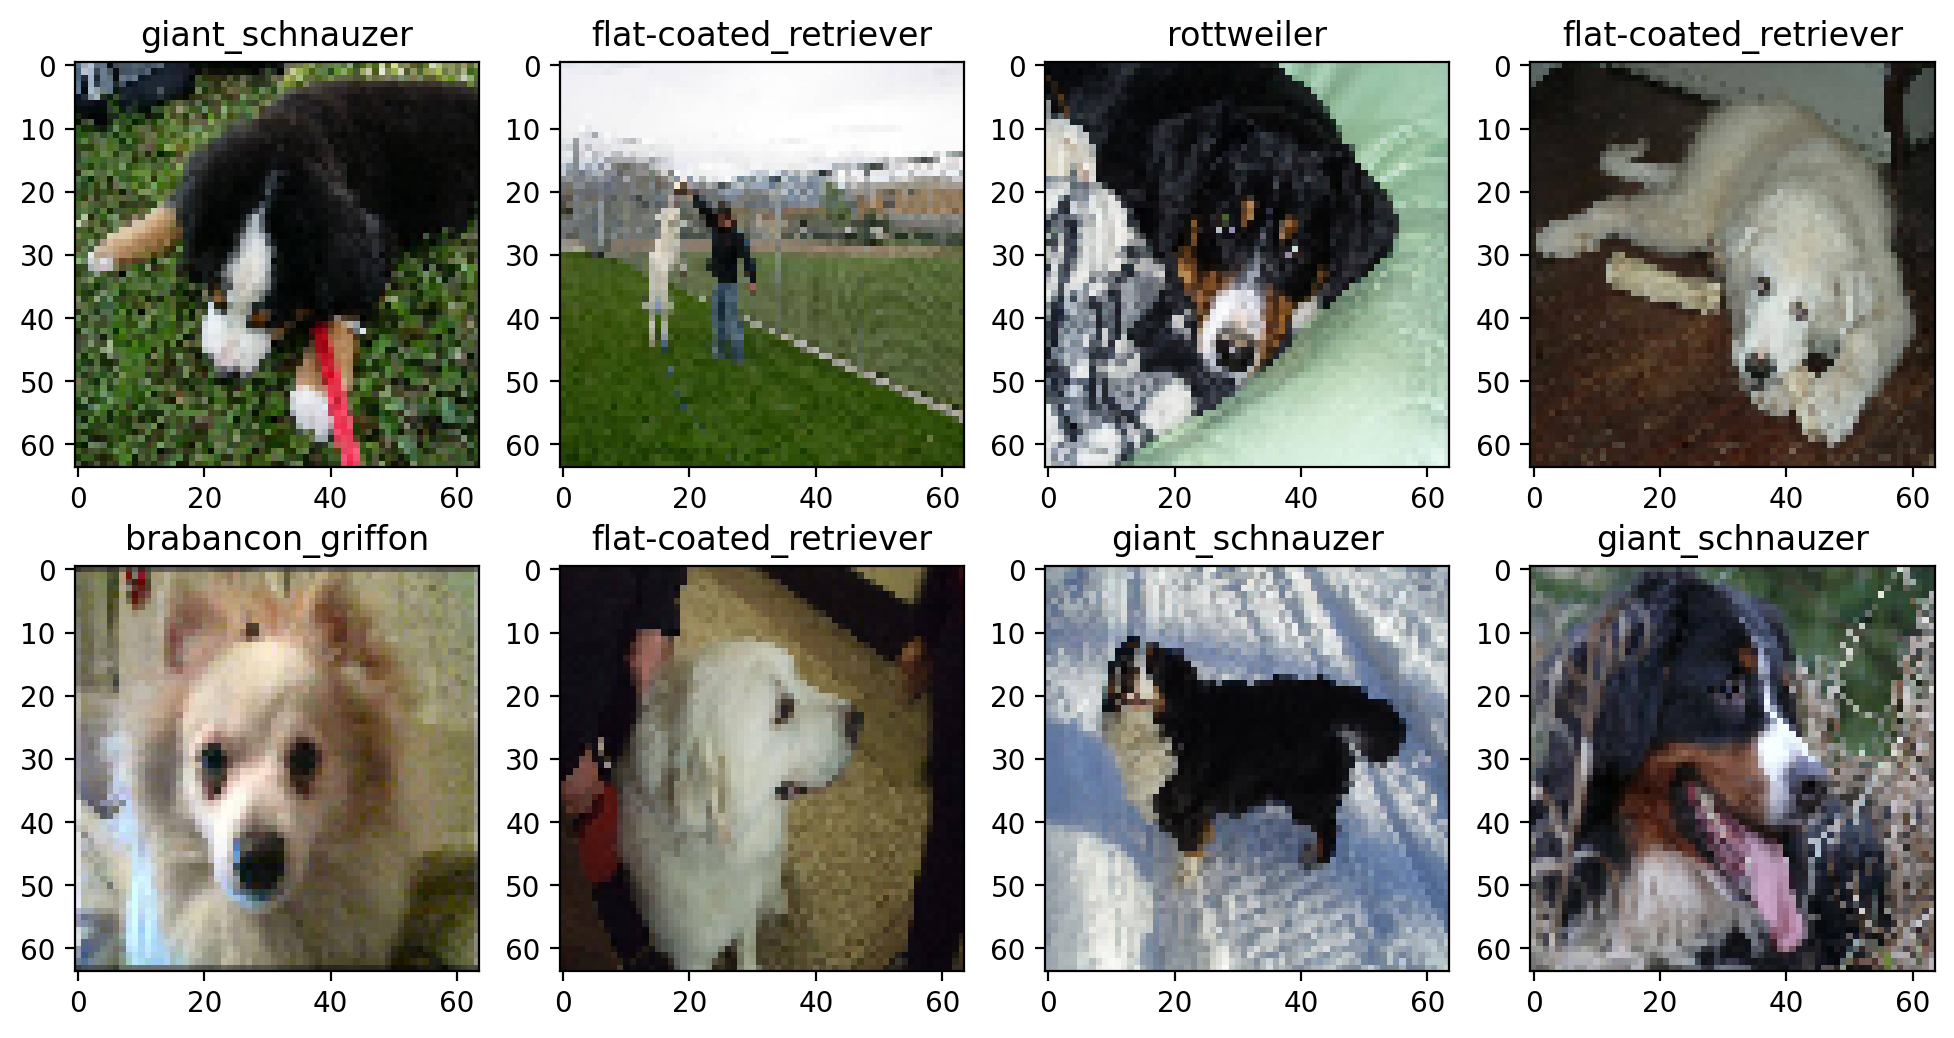

In [169]:
plt.figure(figsize=(12, 6))
for i in range(8):
    random_index = random.randint(0, n_10-1)
    plt.subplot(2, 4, i+1)
    plt.imshow(X_10[random_index][:,:,::-1])
    plt.title(num_to_class[y_10[random_index].argmax()])

In [170]:
X_10.shape

(1141, 64, 64, 3)

In [171]:
y_10.shape

(1141, 10)

In [172]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_10, y_10, test_size=0.2, random_state=42)      

In [173]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(912, 64, 64, 3)
(229, 64, 64, 3)
(912, 10)
(229, 10)


## Сreating CNN

In [174]:
import tensorflow as tf

print(tf.__version__)


2.15.0


In [175]:
from tensorflow import keras

import random
np.random.seed(42)

In [190]:
model = keras.Sequential([        # neural network where layers follow one another

    # First Convolutional layer set
    # Incoming data: a picture of 64 * 64 pixels and 3 colours
    keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(64, 64, 3),
                        activation='relu'),

    # Second Convolutional layer set
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Convolutional layer
    keras.layers.MaxPooling2D(pool_size=(2, 2)),   # Pooling layer
    keras.layers.Dropout(0.25),   # Dropout layer (avoid overfitting)

    # Third Convolutional layer 
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),

    # Fourth Convolutional layer set
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    # 2D to 1D vector conversion layer
    keras.layers.Flatten(),

    # Fully connected layer for classification
    keras.layers.Dense(512, activation='relu'),

    # Dropout layer (avoid overfitting)
    keras.layers.Dropout(0.25),

    # Output Fully Connected Layer
    keras.layers.Dense(10, activation='softmax')

])

In [191]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        18464     
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        9248      
                                                      

In [192]:
# compilation

model.compile(loss='categorical_crossentropy', optimizer='adam',
            metrics=['accuracy'])

In [193]:
# neural network training

history = model.fit(X_train, y_train,
            # at each step, analyse batch_size of images at the same time
            batch_size = 20,

            # the number of times of training using the whole dataset
            epochs = 50,
            
            # Boolean (whether to shuffle the training data before each epoch)
            shuffle = True,
             
            # 1 = progress bar printing
            verbose = 1
            )

Epoch 1/50
46/46 [==============================] - 7s 116ms/step - loss: 12.9417 - accuracy: 0.0899
Epoch 2/50
46/46 [==============================] - 5s 106ms/step - loss: 2.2913 - accuracy: 0.1096
Epoch 3/50
46/46 [==============================] - 5s 102ms/step - loss: 2.2663 - accuracy: 0.1787
Epoch 4/50
46/46 [==============================] - 5s 106ms/step - loss: 2.1725 - accuracy: 0.2160
Epoch 5/50
46/46 [==============================] - 5s 102ms/step - loss: 1.9582 - accuracy: 0.3070
Epoch 6/50
46/46 [==============================] - 5s 101ms/step - loss: 1.6654 - accuracy: 0.4320
Epoch 7/50
46/46 [==============================] - 5s 108ms/step - loss: 1.3846 - accuracy: 0.5263
Epoch 8/50
46/46 [==============================] - 5s 101ms/step - loss: 1.0017 - accuracy: 0.6458
Epoch 9/50
46/46 [==============================] - 5s 103ms/step - loss: 0.8123 - accuracy: 0.7182
Epoch 10/50
46/46 [==============================] - 5s 110ms/step - loss: 0.6627 - accuracy: 0.780

In [194]:
# evaluation of the result on the train and test data

scores_train = model.evaluate(X_train, y_train, verbose=1)
scores_test = model.evaluate(X_test, y_test, verbose=1)

8/8 [==============================] - 0s 28ms/step - loss: 4.5425 - accuracy: 0.2140


In [195]:
print("Train Accuracy: %.2f%%" % (scores_train[1]*100))
print("Test  Accuracy: %.2f%%" % (scores_test[1]*100))

Train Accuracy: 99.67%
Test  Accuracy: 21.40%


C:\Users\vital\AppData\Local\Temp\ipykernel_25880\2361367941.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


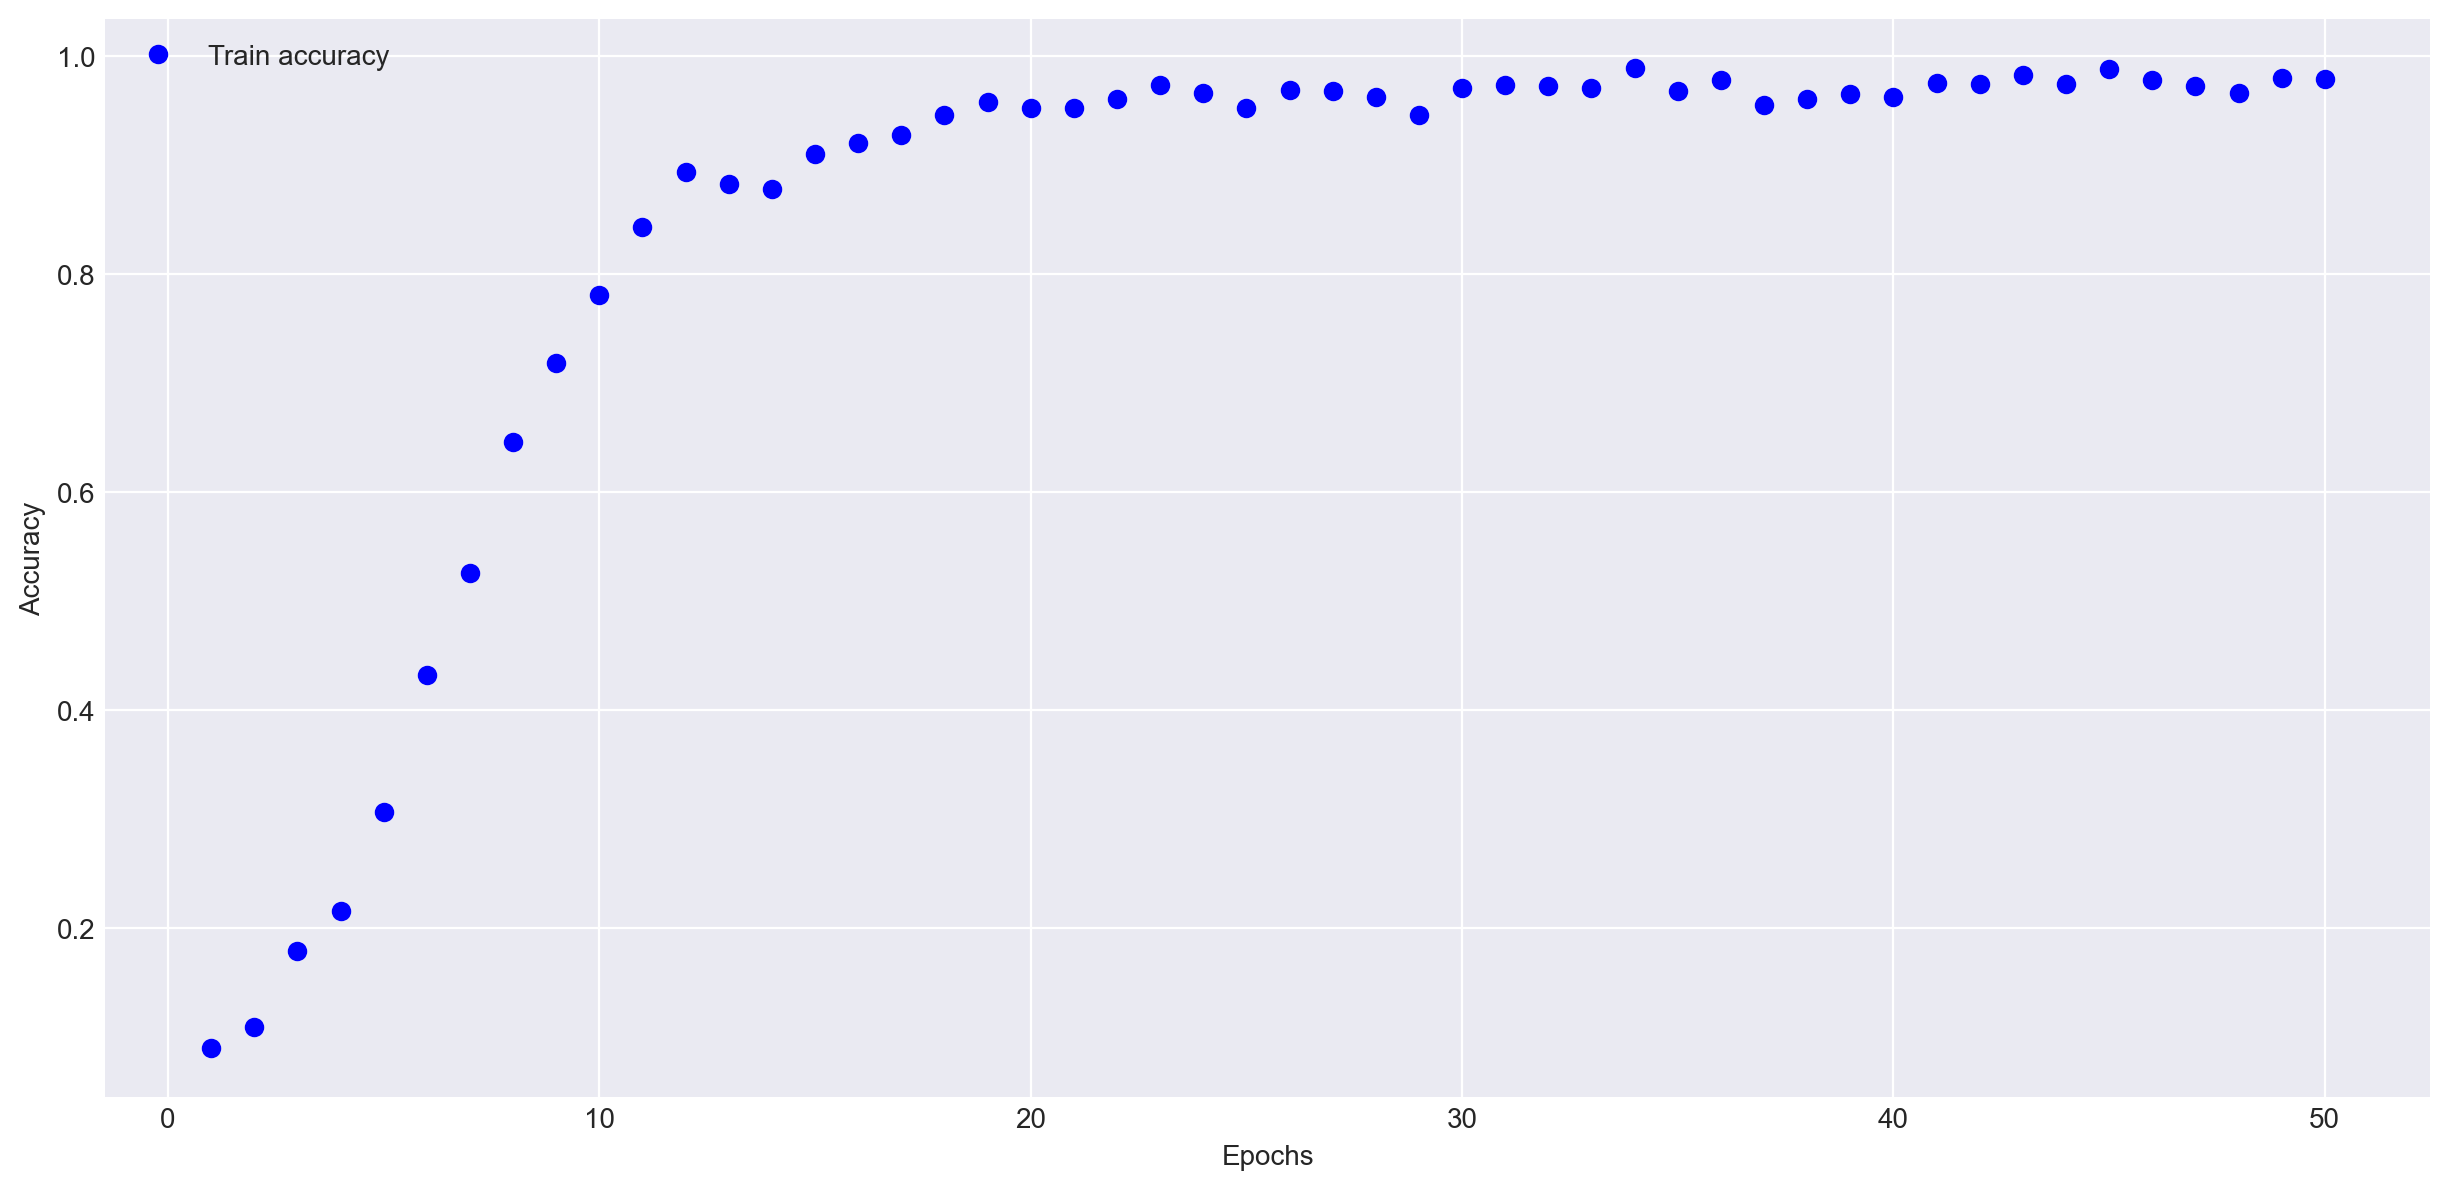

In [196]:
# printing the results

history_dict = history.history
plt.style.use('seaborn-darkgrid') 

acc_values = history_dict['accuracy']
#val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Train accuracy')
#plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Saving the trained neural network in files

In [197]:
model_json = model.to_json() # special format for model

json_file = open("Dog_CNN.json", "w")
json_file.write(model_json)
json_file.close()

In [198]:
# save the weights of the trained network in a different format: HDF5

model.save_weights("Dog_CNN.h5")